In [2]:
# import subprocess
# subprocess.run(['python','cleaning.py'])

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

DATA_PATH = "..\\data\\jake_files\\"

In [3]:
df = pd.read_csv(f'{DATA_PATH}data_clean.csv').set_index('chargeid')
df_drugs = df[df['offtype'] == 'drugs']

df_drugs['presumptive_commitment'] = np.where(df_drugs['presumpt'] == 'commit', df_drugs['time'], 0)
df_drugs['pronounced_commitment'] = np.where(df_drugs['prison'] == 'yes', df_drugs['confine'], 0)

C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\1613103216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs['presumptive_commitment'] = np.where(df_drugs['presumpt'] == 'commit', df_drugs['time'], 0)
C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\1613103216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs['pronounced_commitment'] = np.where(df_drugs['prison'] == 'yes', df_drugs['confine'], 0)


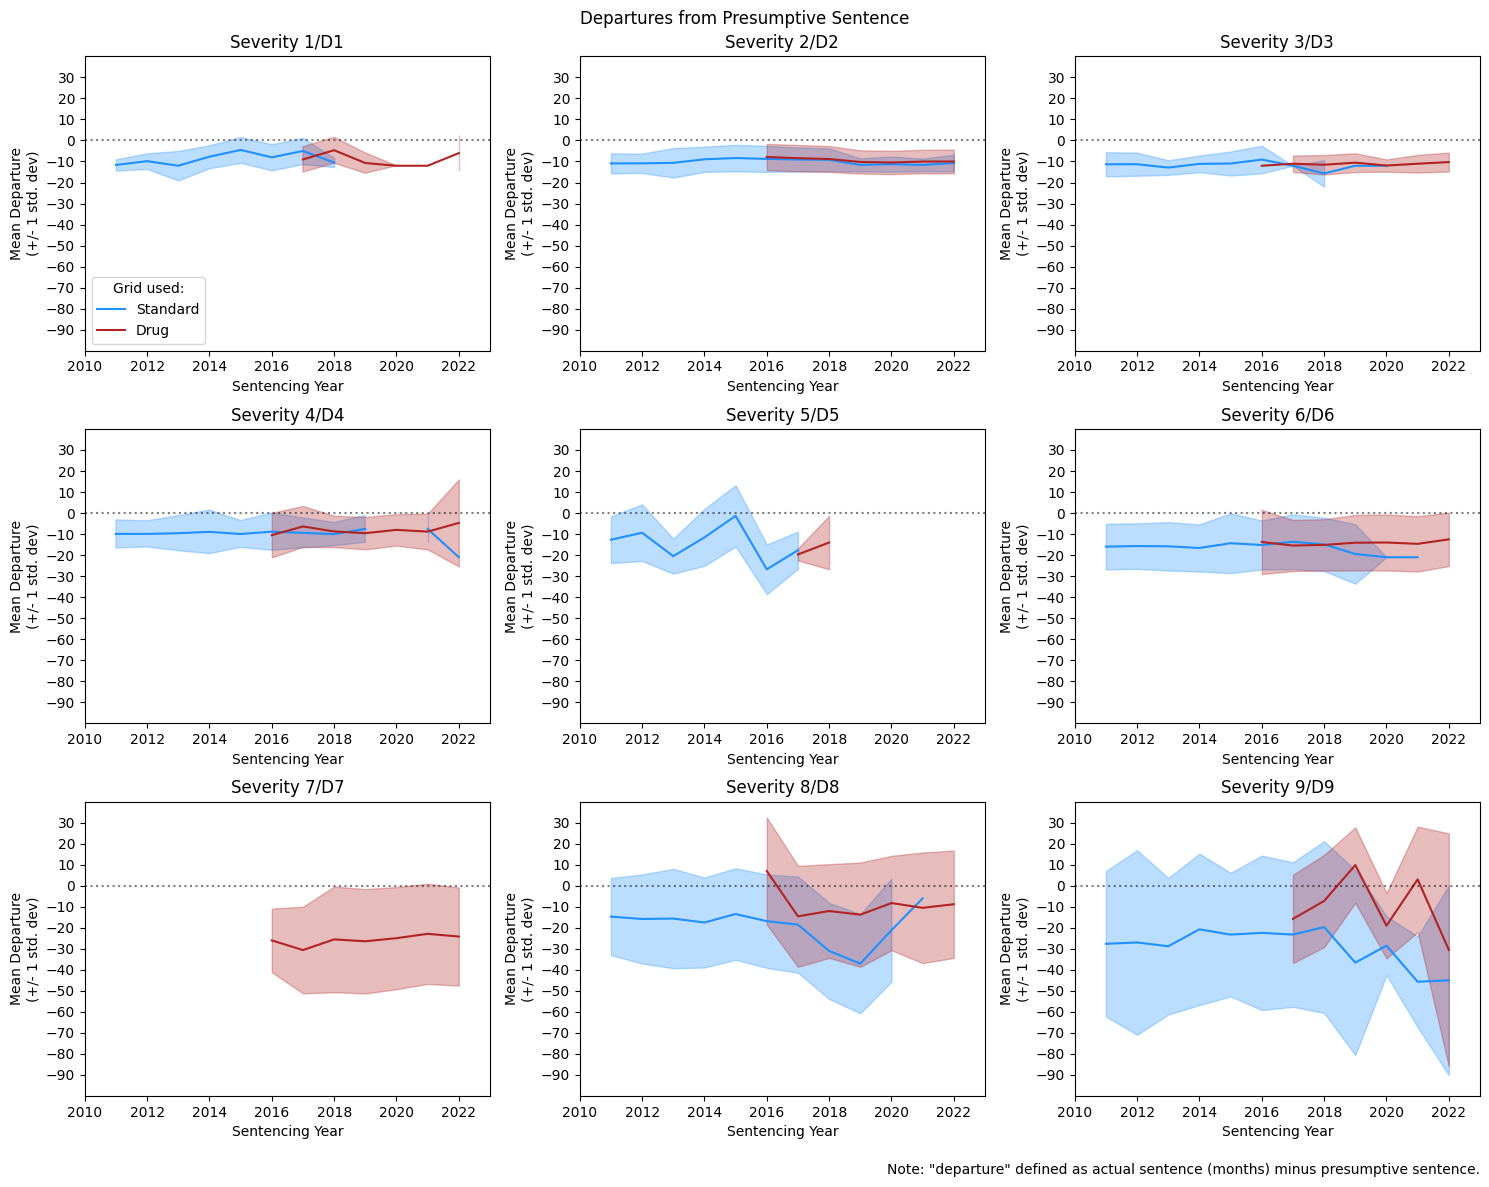

In [4]:
# grouping by year and severity and filtering to just cases where there was a departure from presumptive

agg_df = df_drugs[df_drugs['departure_presumpt'] != 0].groupby(['sentyear','severity']).agg({
                                                        'departure_presumpt': ['mean', 'median', 'std']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['departure_presumpt_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['departure_presumpt_mean'] - data['departure_presumpt_std'],
                                data['departure_presumpt_mean'] + data['departure_presumpt_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Mean Departure\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'lower left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-100, 40)
    axes[idx].set_yticks(np.arange(-90, 31, 10))

fig.suptitle('Departures from Presumptive Sentence')
fig.text(0.99, 0.01, 'Note: "departure" defined as actual sentence (months) minus presumptive sentence.', ha='right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\presumptive_departures_by_severity.png')
plt.show()

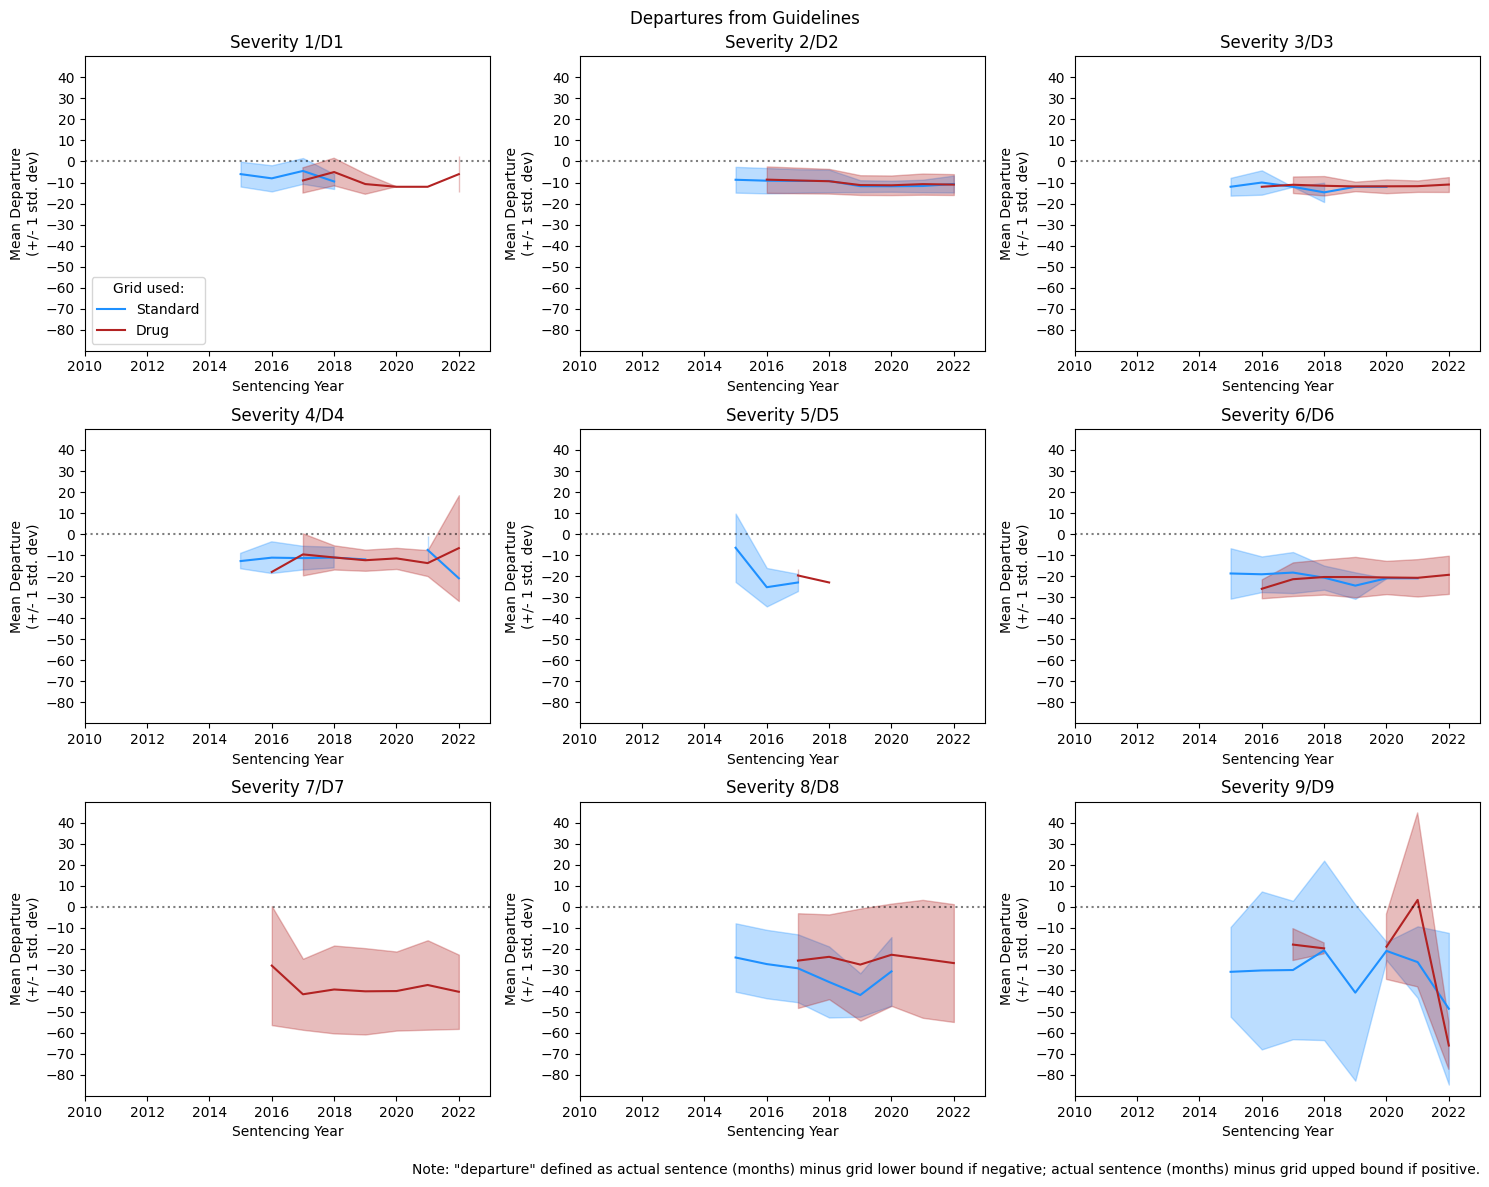

In [5]:
# grouping by year and severity and filtering to just cases where there was a departure from grid

agg_df = df_drugs[df_drugs['departure_grid'] != 0].groupby(['sentyear','severity']).agg({
                                                        'departure_grid': ['mean', 'median', 'std'],
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['departure_grid_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                        data['departure_grid_mean'] - data['departure_grid_std'],
                        data['departure_grid_mean'] + data['departure_grid_std'],
                        color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Mean Departure\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'lower left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-90, 50)
    axes[idx].set_yticks(np.arange(-80, 41, 10))

fig.suptitle('Departures from Guidelines')
fig.text(0.99, 0.01, 'Note: "departure" defined as actual sentence (months) minus grid lower bound if negative; actual sentence (months) minus grid upped bound if positive.', ha='right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\grid_departures_by_severity.png')
plt.show()


C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\287877204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\287877204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']


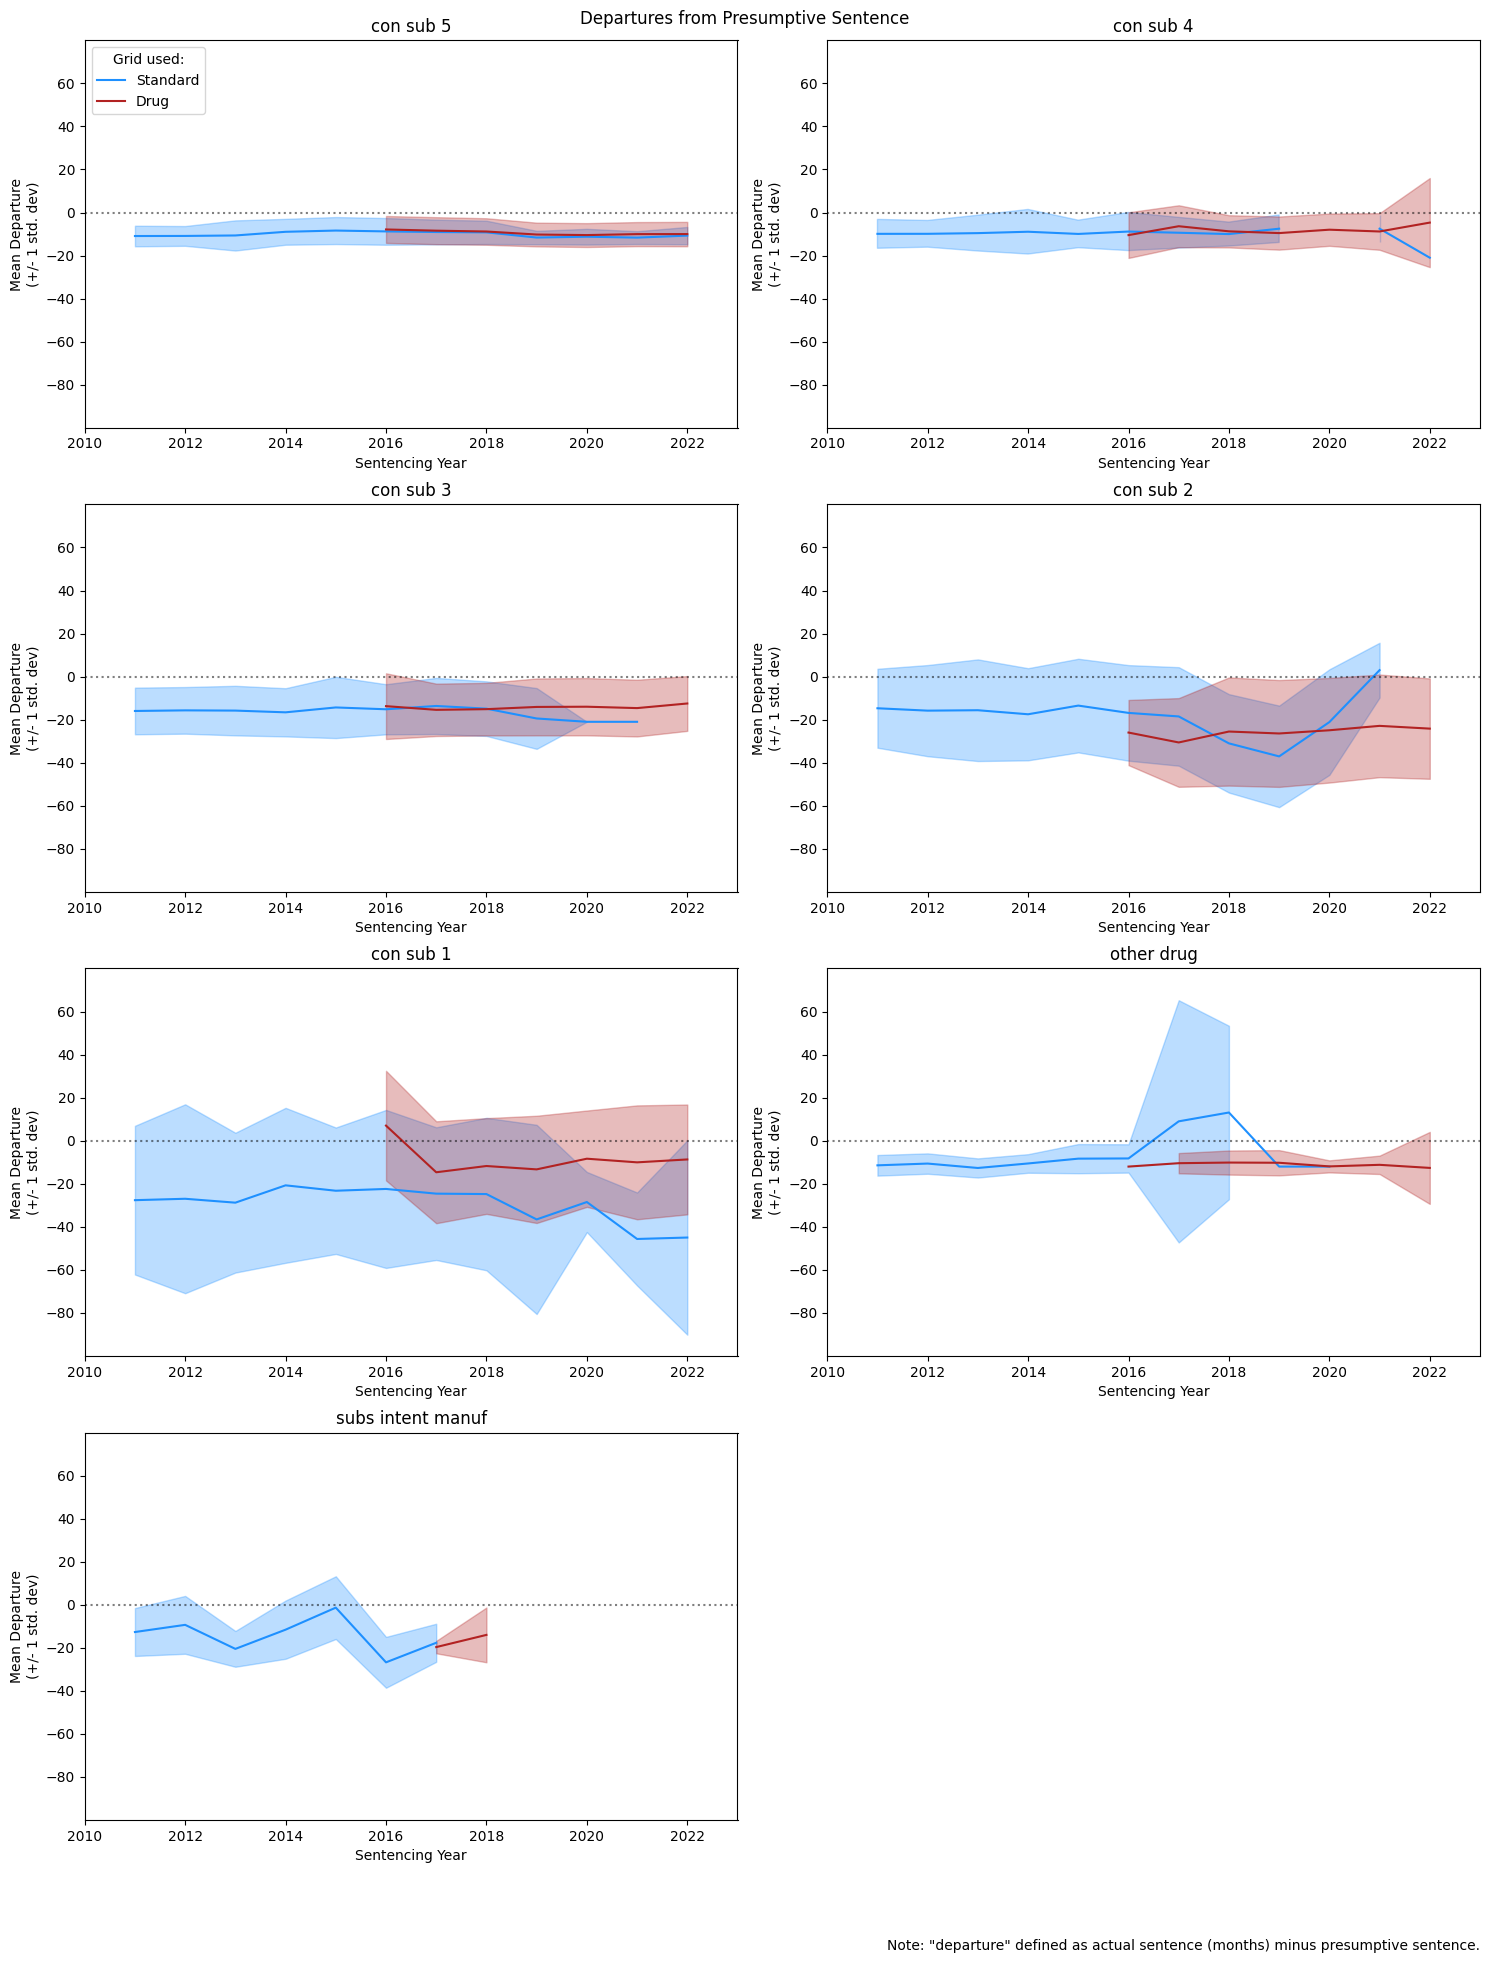

In [6]:
agg_df = df_drugs[df_drugs['departure_presumpt'] != 0]
agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'departure_presumpt': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['departure_presumpt_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['departure_presumpt_mean'] - data['departure_presumpt_std'],
                                data['departure_presumpt_mean'] + data['departure_presumpt_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Mean Departure\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-100, 80)
    axes[idx].set_yticks(np.arange(-80, 61, 20))

axes[-1].axis('off')

fig.suptitle('Departures from Presumptive Sentence')
fig.text(0.99, 0.01, 'Note: "departure" defined as actual sentence (months) minus presumptive sentence.', ha='right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\presumptive_departures_by_offense.png')
plt.show()

C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\3713962665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
C:\Users\jacob\AppData\Local\Temp\ipykernel_17144\3713962665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']


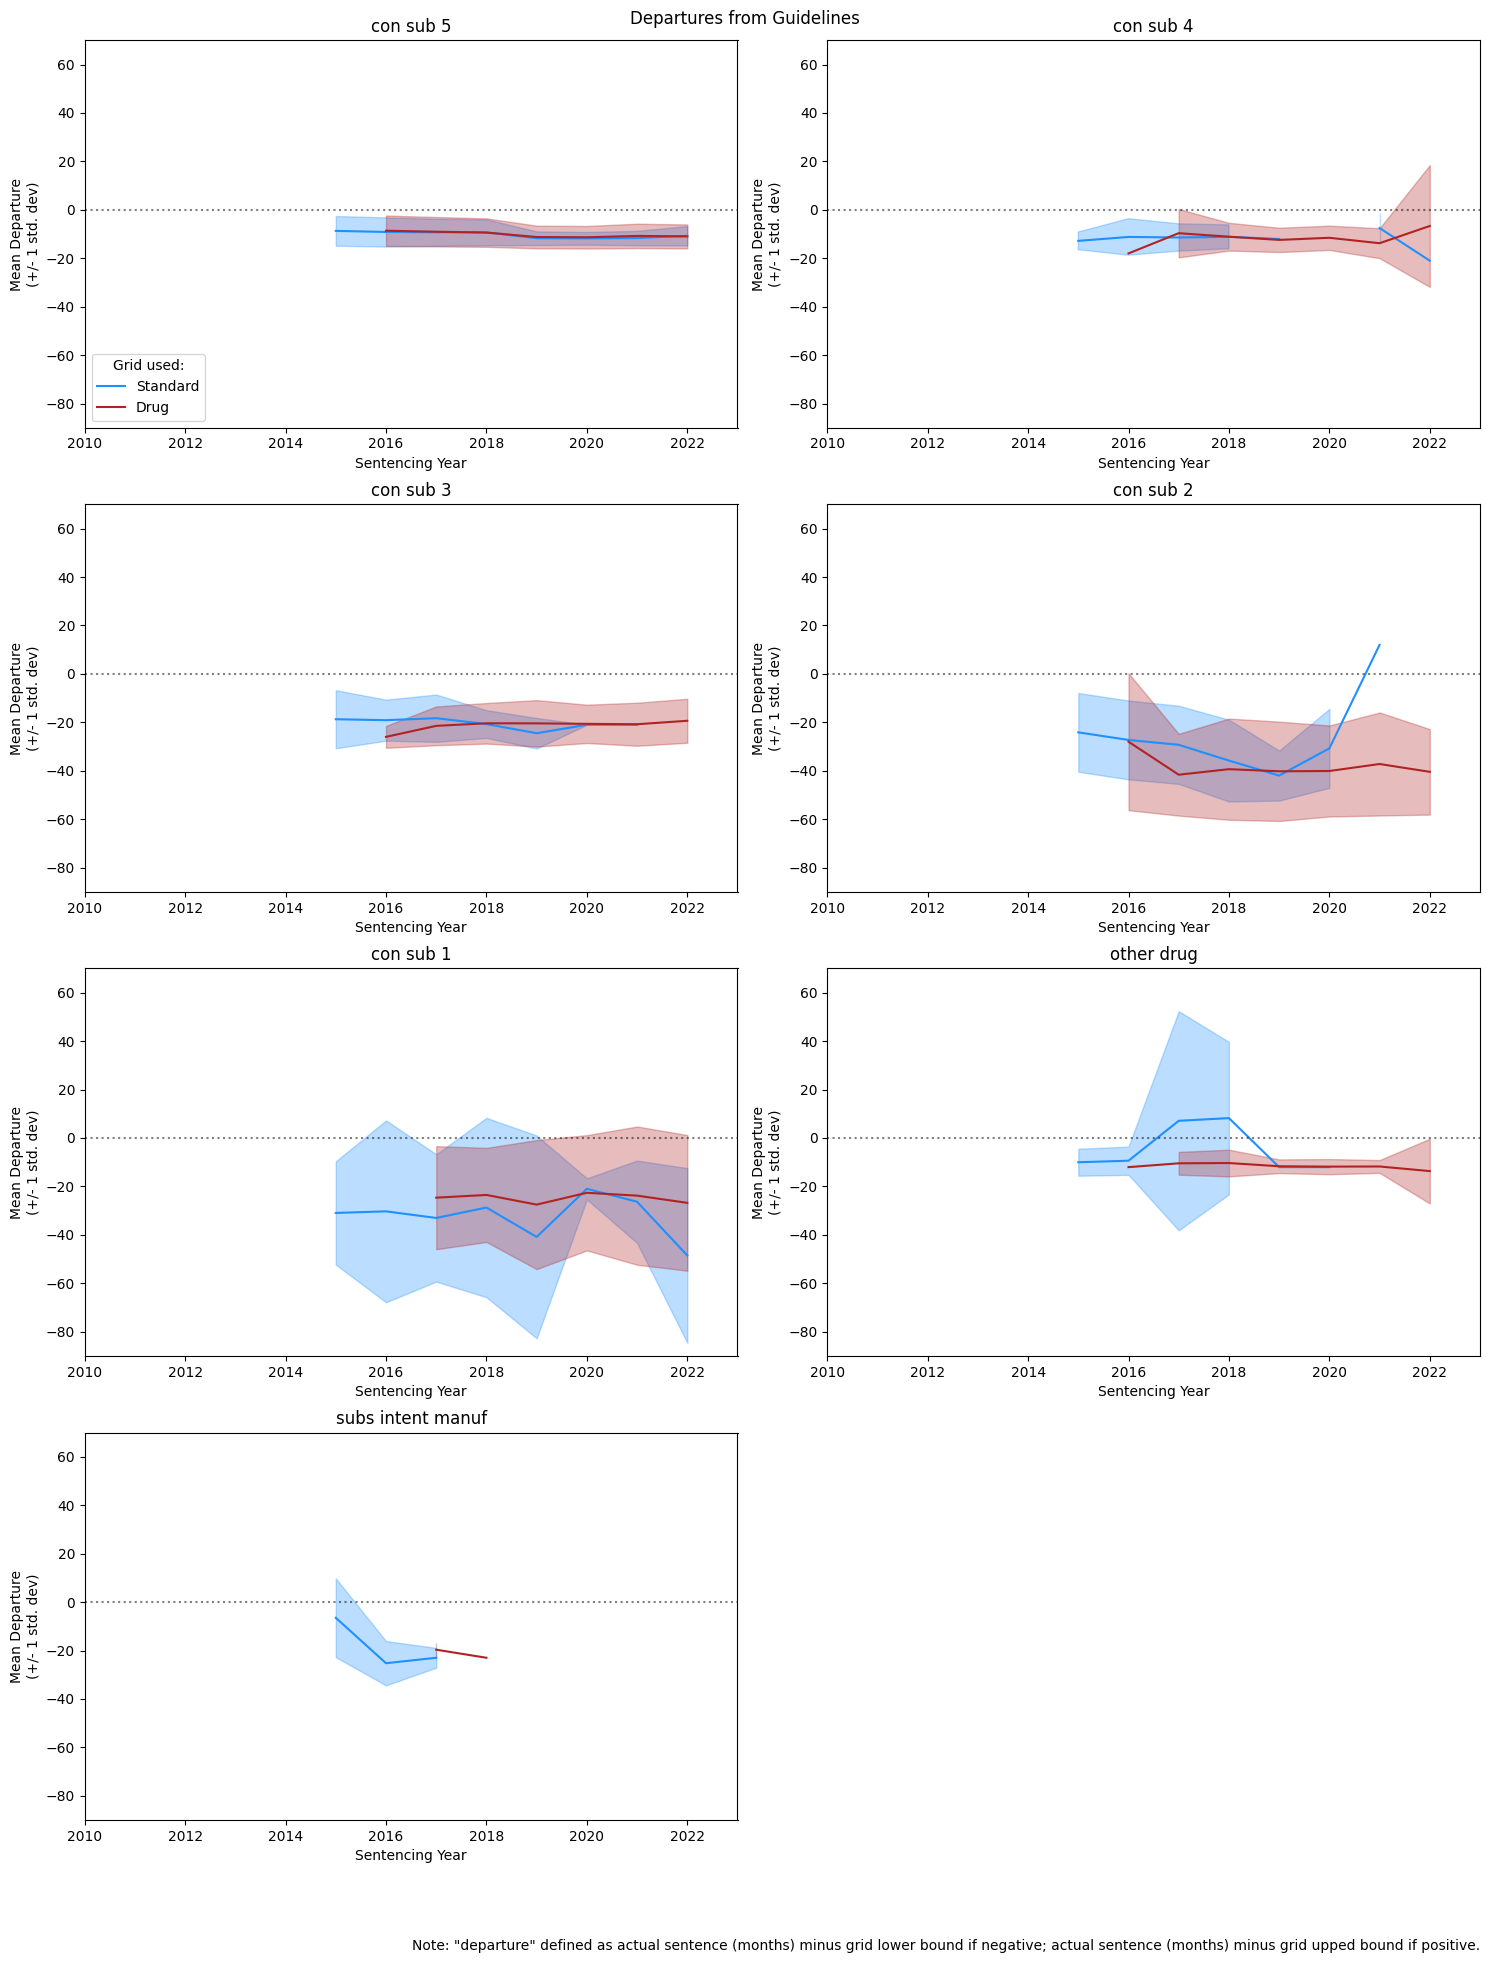

In [7]:
agg_df = df_drugs[df_drugs['departure_grid'] != 0]
agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'departure_grid': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['departure_grid_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['departure_grid_mean'] - data['departure_grid_std'],
                                data['departure_grid_mean'] + data['departure_grid_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Mean Departure\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'lower left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-90, 70)
    axes[idx].set_yticks(np.arange(-80, 61, 20))

axes[-1].axis('off')

fig.suptitle('Departures from Guidelines')
fig.text(0.99, 0.01, 'Note: "departure" defined as actual sentence (months) minus grid lower bound if negative; actual sentence (months) minus grid upped bound if positive.', ha='right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\grid_departures_by_offense.png')
plt.show()

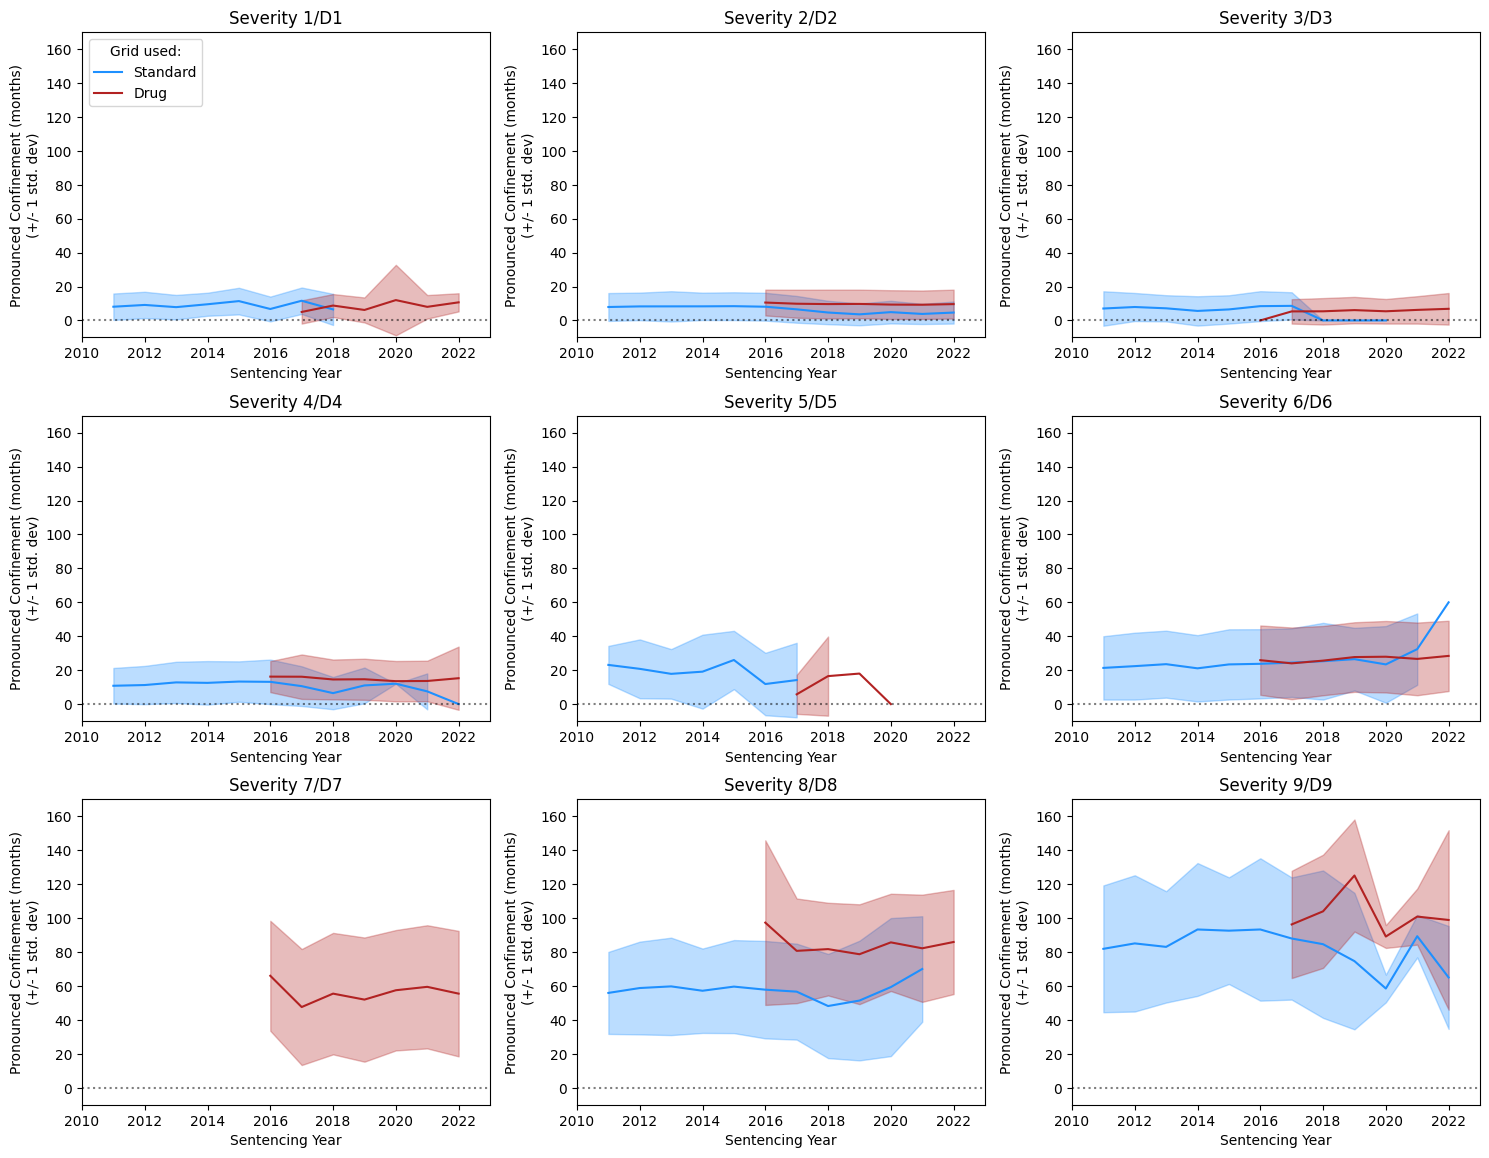

In [8]:
# grouping by year and severity looking at pronounced confinements

agg_df = df_drugs.groupby(['sentyear','severity']).agg({
                                                        'confine': ['mean', 'median', 'std']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['confine_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['confine_mean'] - data['confine_std'],
                                data['confine_mean'] + data['confine_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Pronounced Confinement (months)\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-10, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))

# fig.suptitle('Pronounced Confinement (months)')
# fig.text(0.99, 0.01, 'Note: "departure" defined as actual sentence (months) minus presumptive sentence.', ha='right', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\confine_by_severity.png')
plt.show()

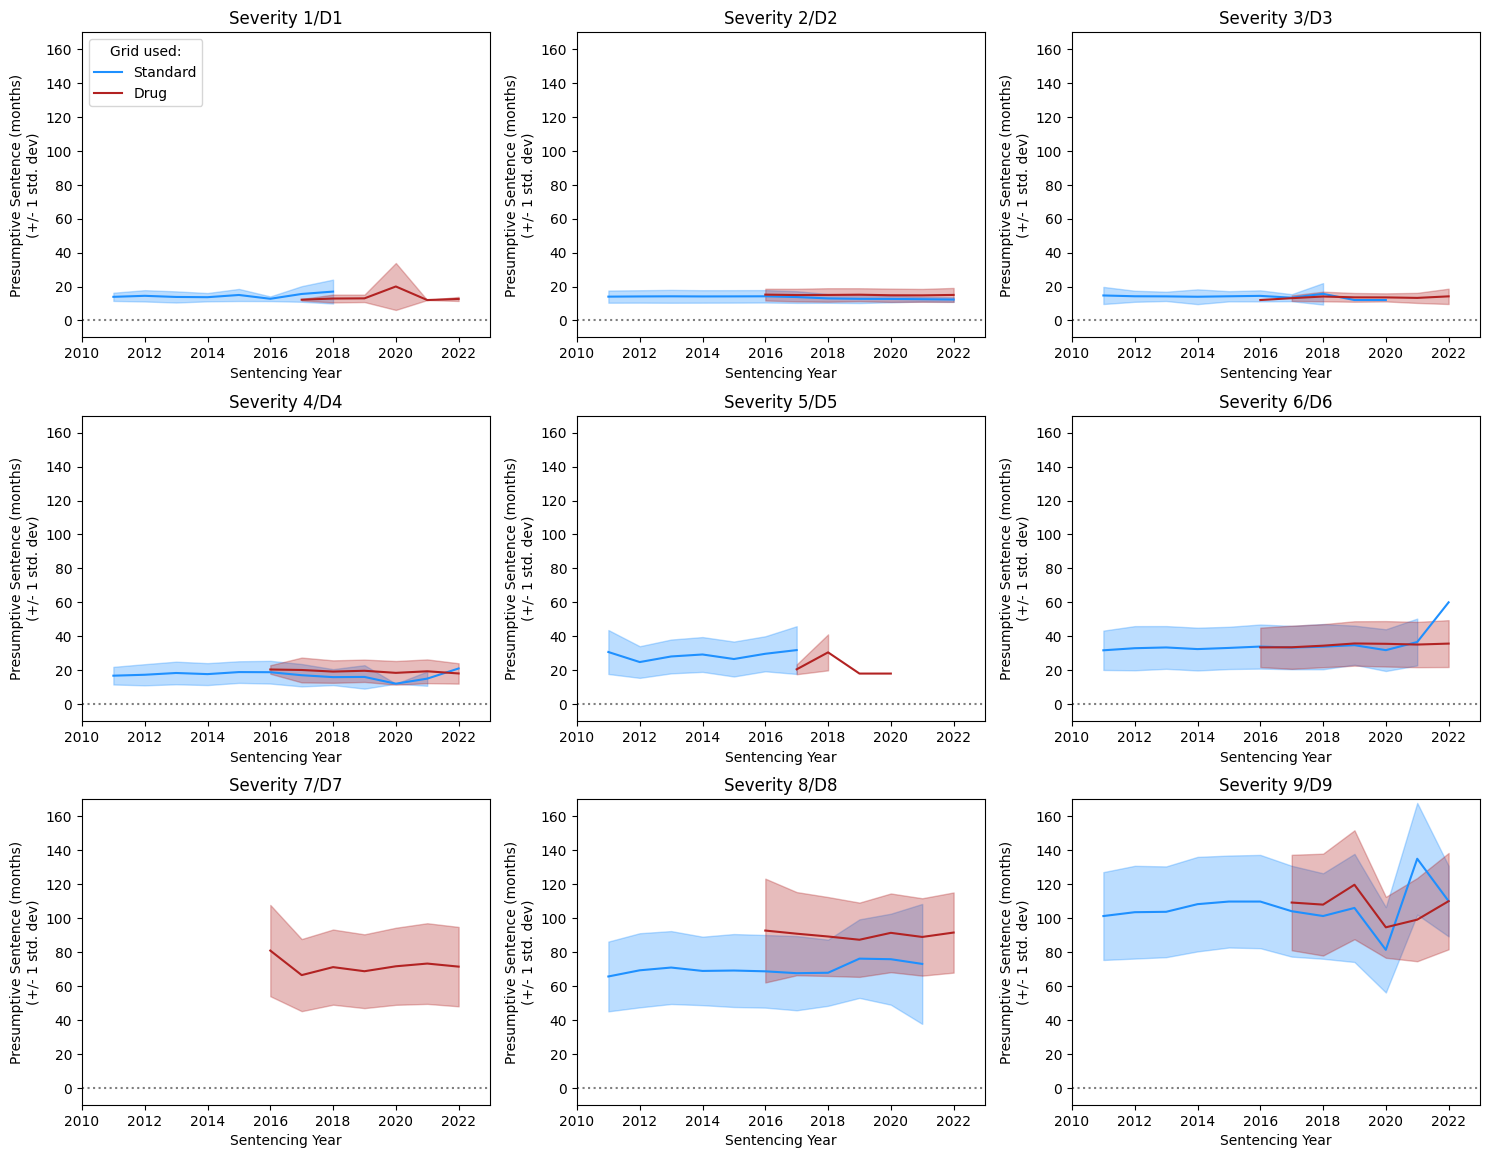

In [9]:
# grouping by year and severity looking at presumptive sentence

agg_df = df_drugs.groupby(['sentyear','severity']).agg({
                                                        'time': ['mean', 'median', 'std']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['time_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['time_mean'] - data['time_std'],
                                data['time_mean'] + data['time_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Presumptive Sentence (months)\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-10, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\time_by_severity.png')
plt.show()

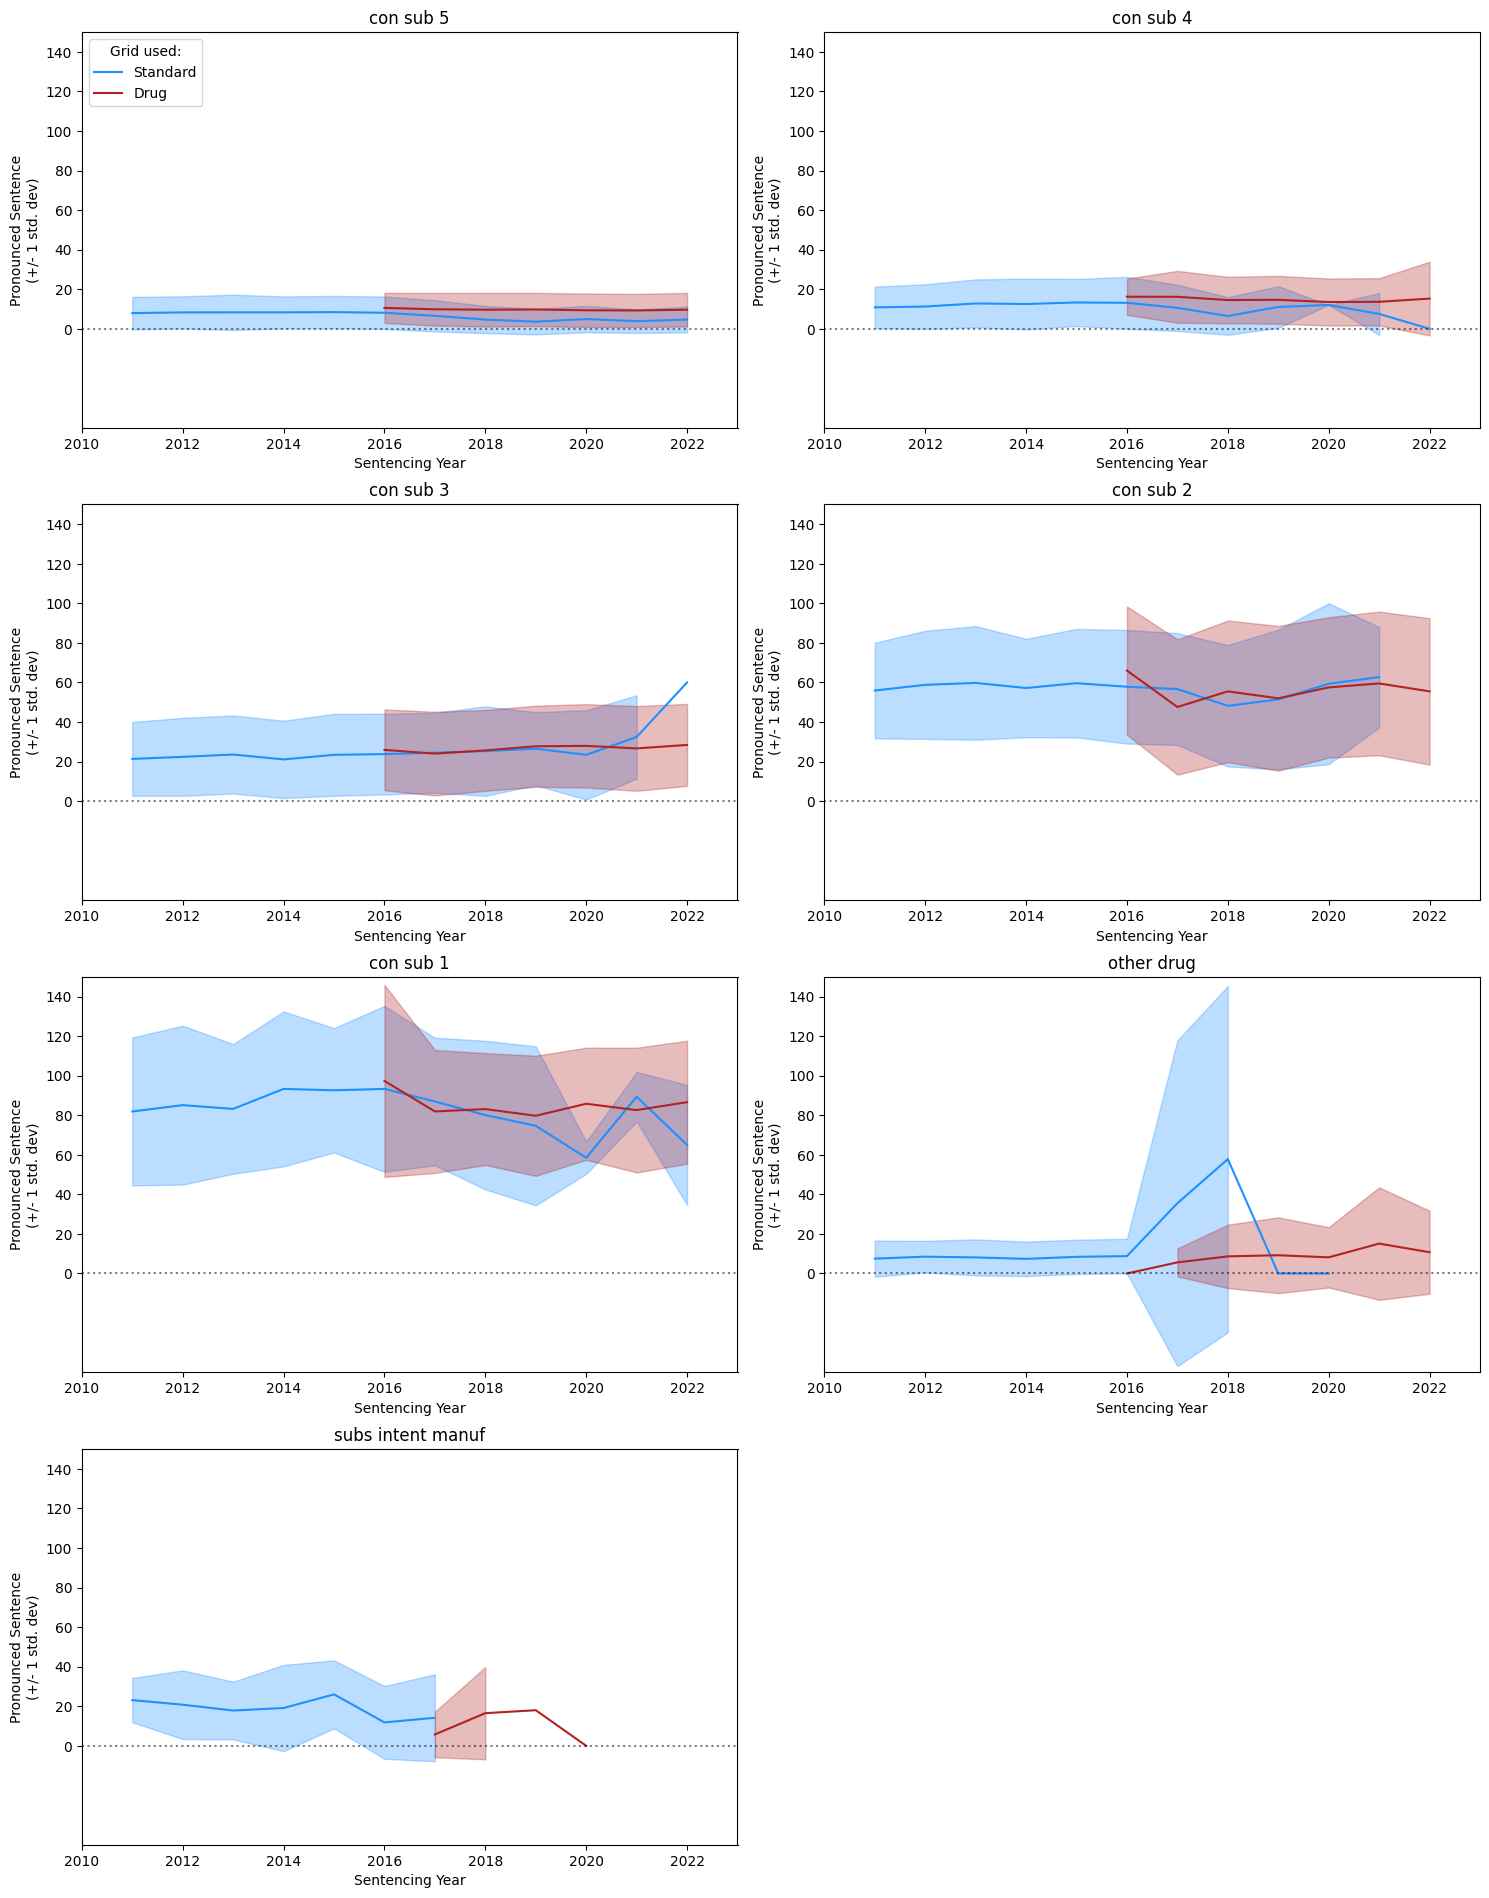

In [10]:
agg_df = df_drugs.copy(deep=True)

agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'confine': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['confine_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['confine_mean'] - data['confine_std'],
                                data['confine_mean'] + data['confine_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Pronounced Sentence\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-50, 150)
    axes[idx].set_yticks(np.arange(0, 141, 20))

axes[-1].axis('off')


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\confine_by_offense.png')
plt.show()

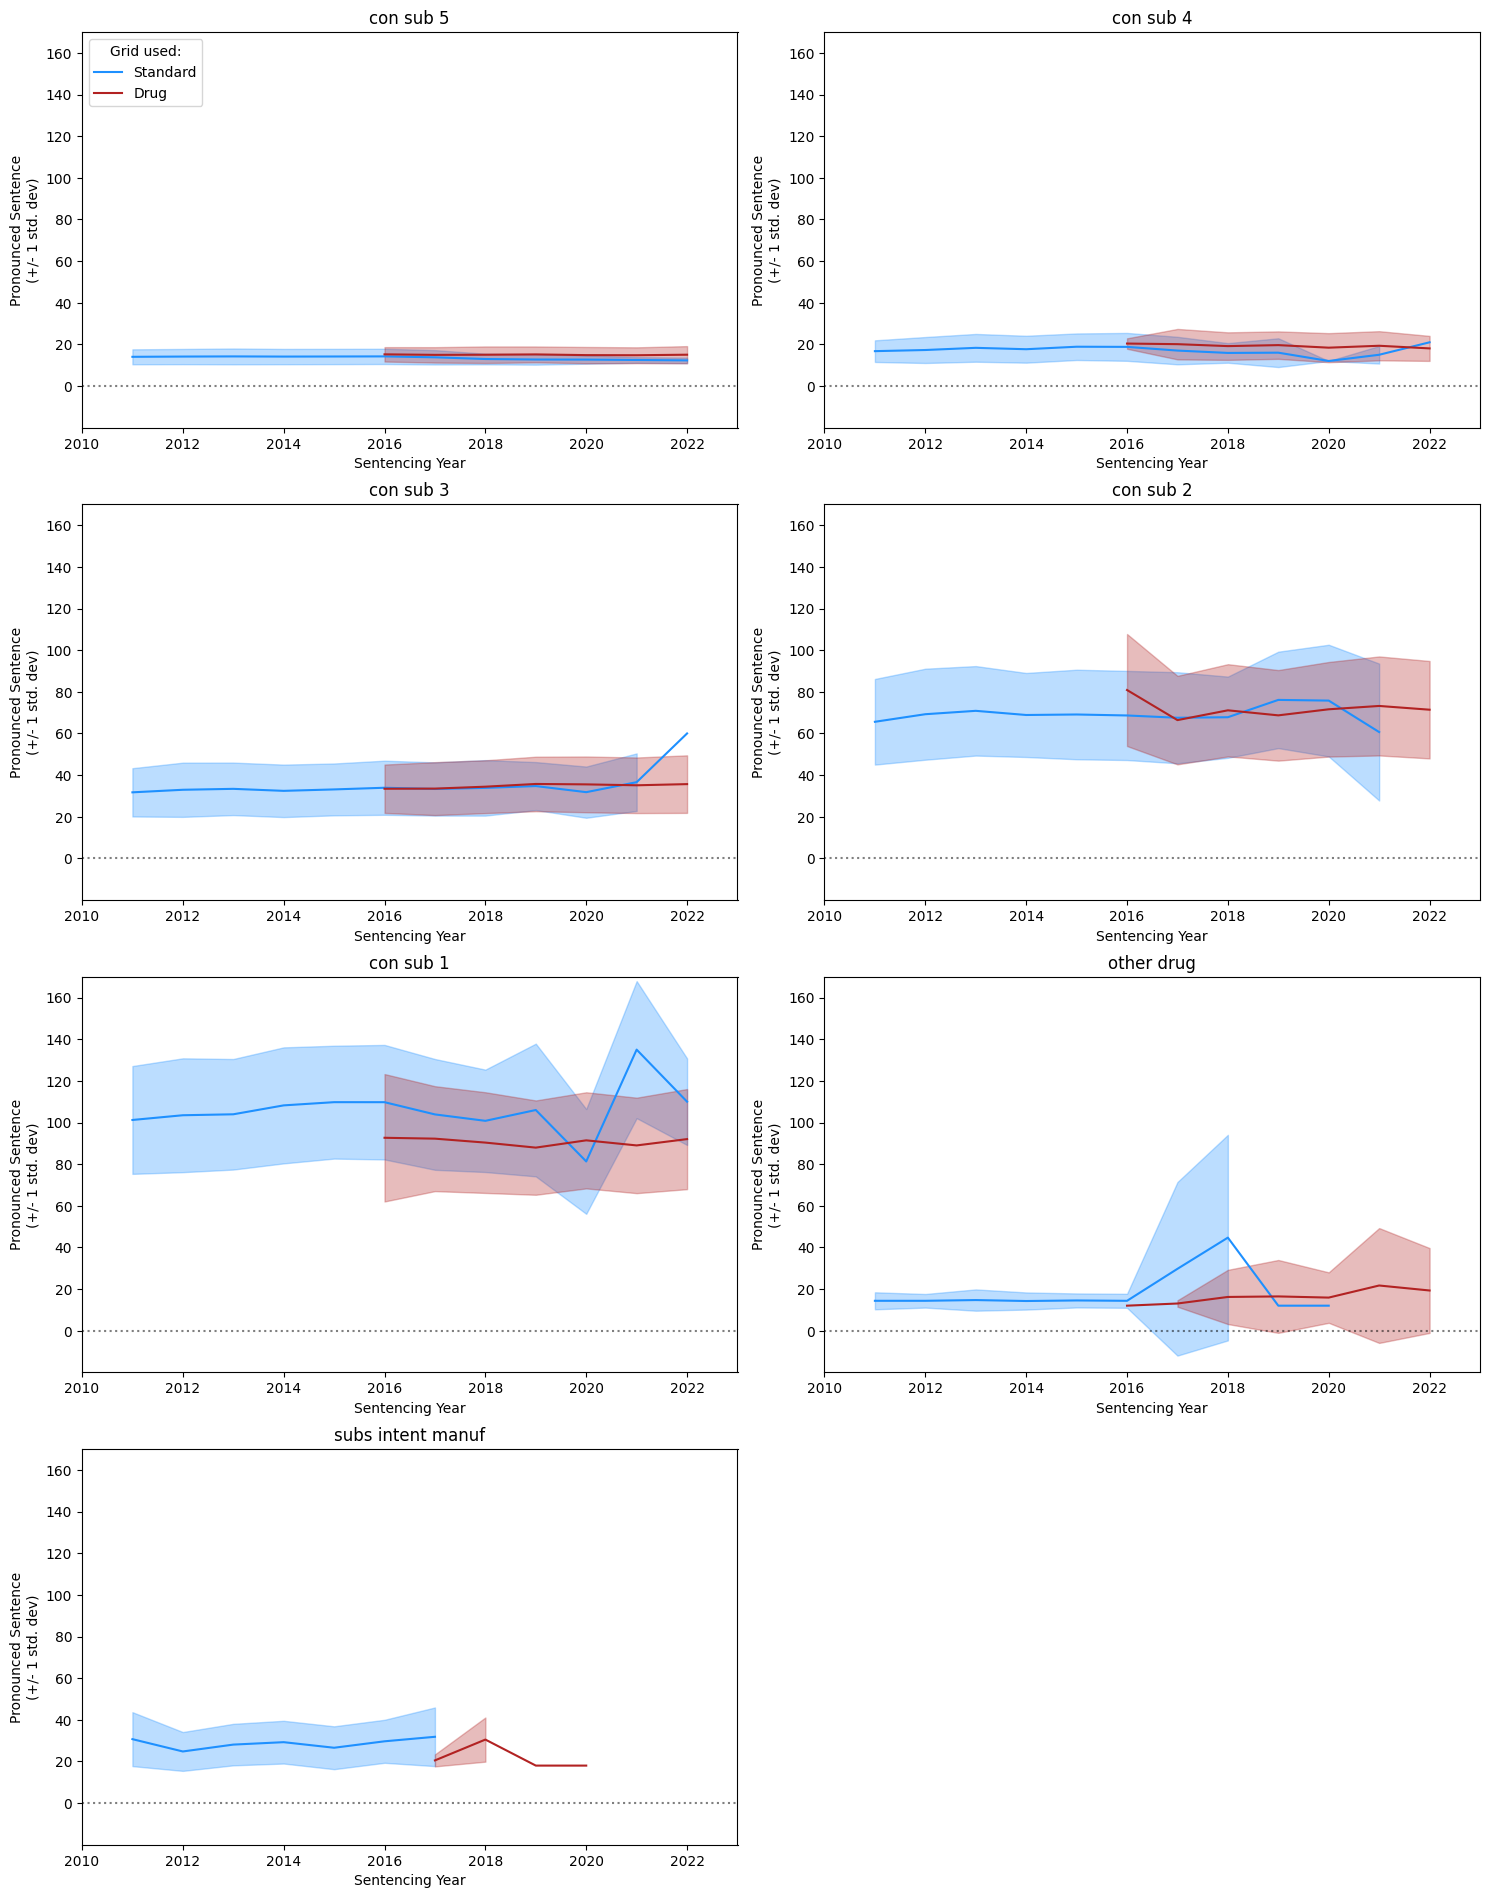

In [11]:
agg_df = df_drugs.copy(deep=True)

agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'time': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['time_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['time_mean'] - data['time_std'],
                                data['time_mean'] + data['time_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Pronounced Sentence\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-20, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))

axes[-1].axis('off')


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\time_by_offense.png')
plt.show()

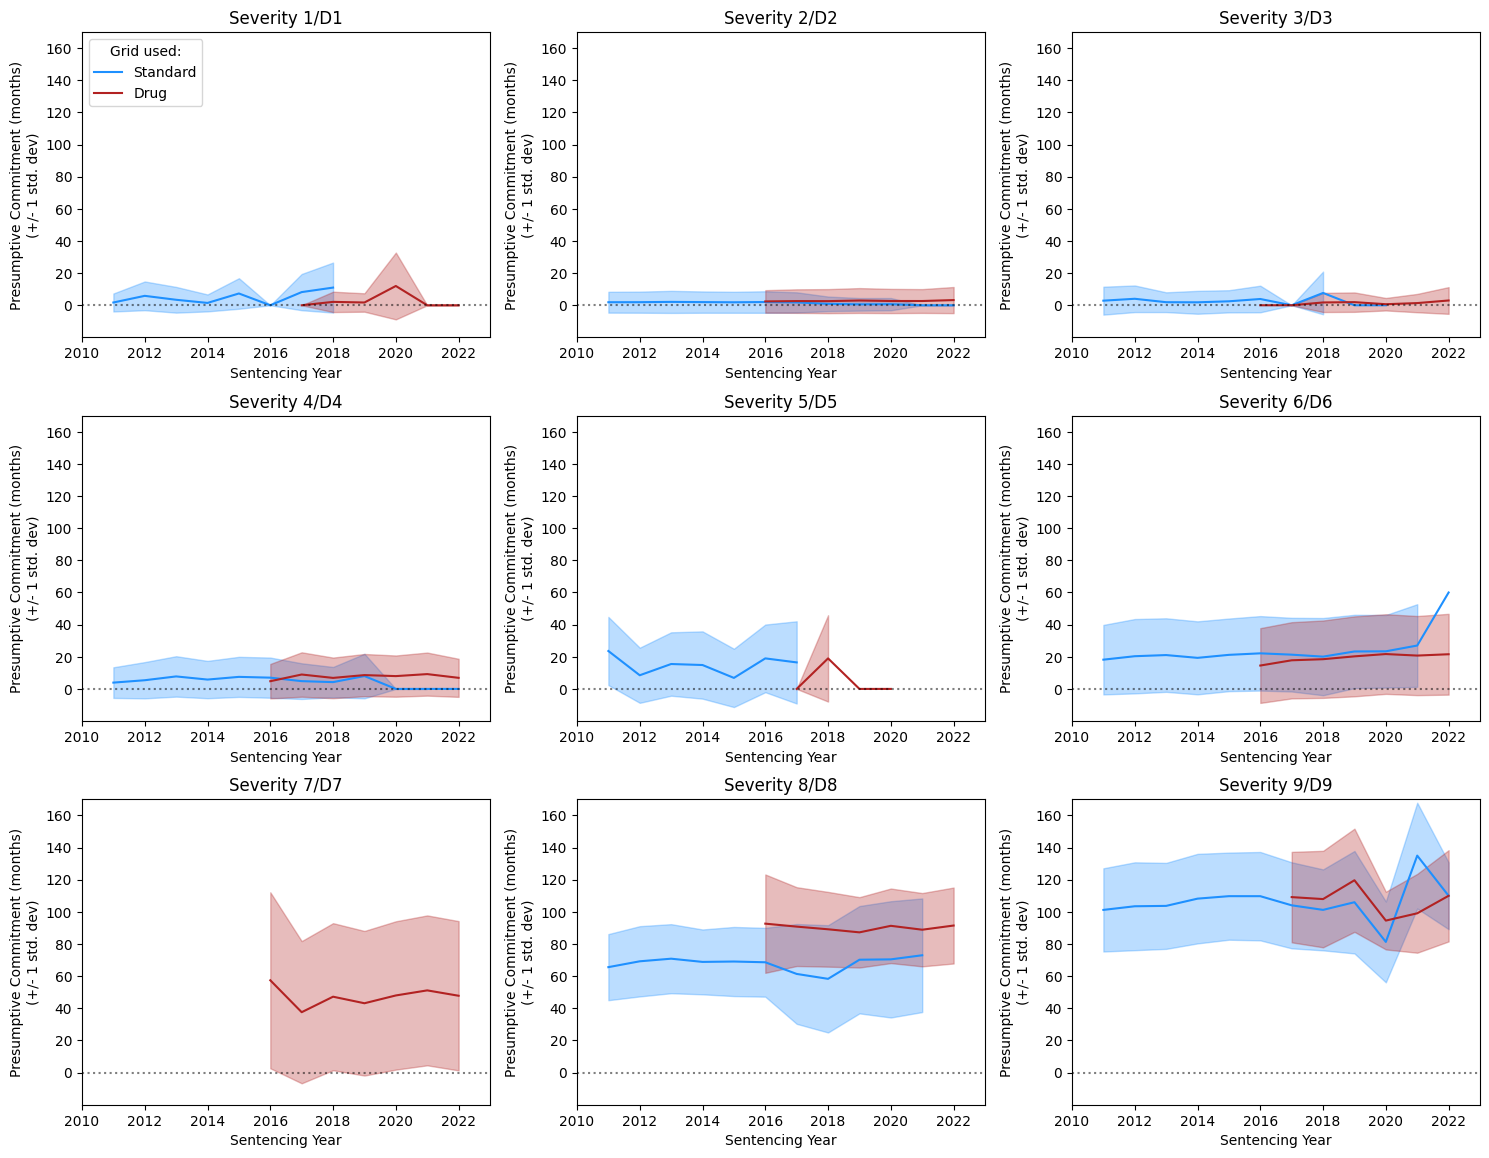

In [36]:
# presumptive commitment x Severity
agg_df = df_drugs.groupby(['sentyear','severity']).agg({
                                                        'presumptive_commitment': ['mean', 'median', 'std']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['presumptive_commitment_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['presumptive_commitment_mean'] - data['presumptive_commitment_std'],
                                data['presumptive_commitment_mean'] + data['presumptive_commitment_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Presumptive Commitment (months)\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-20, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\presumptive_commitment_by_severity.png')
plt.show()

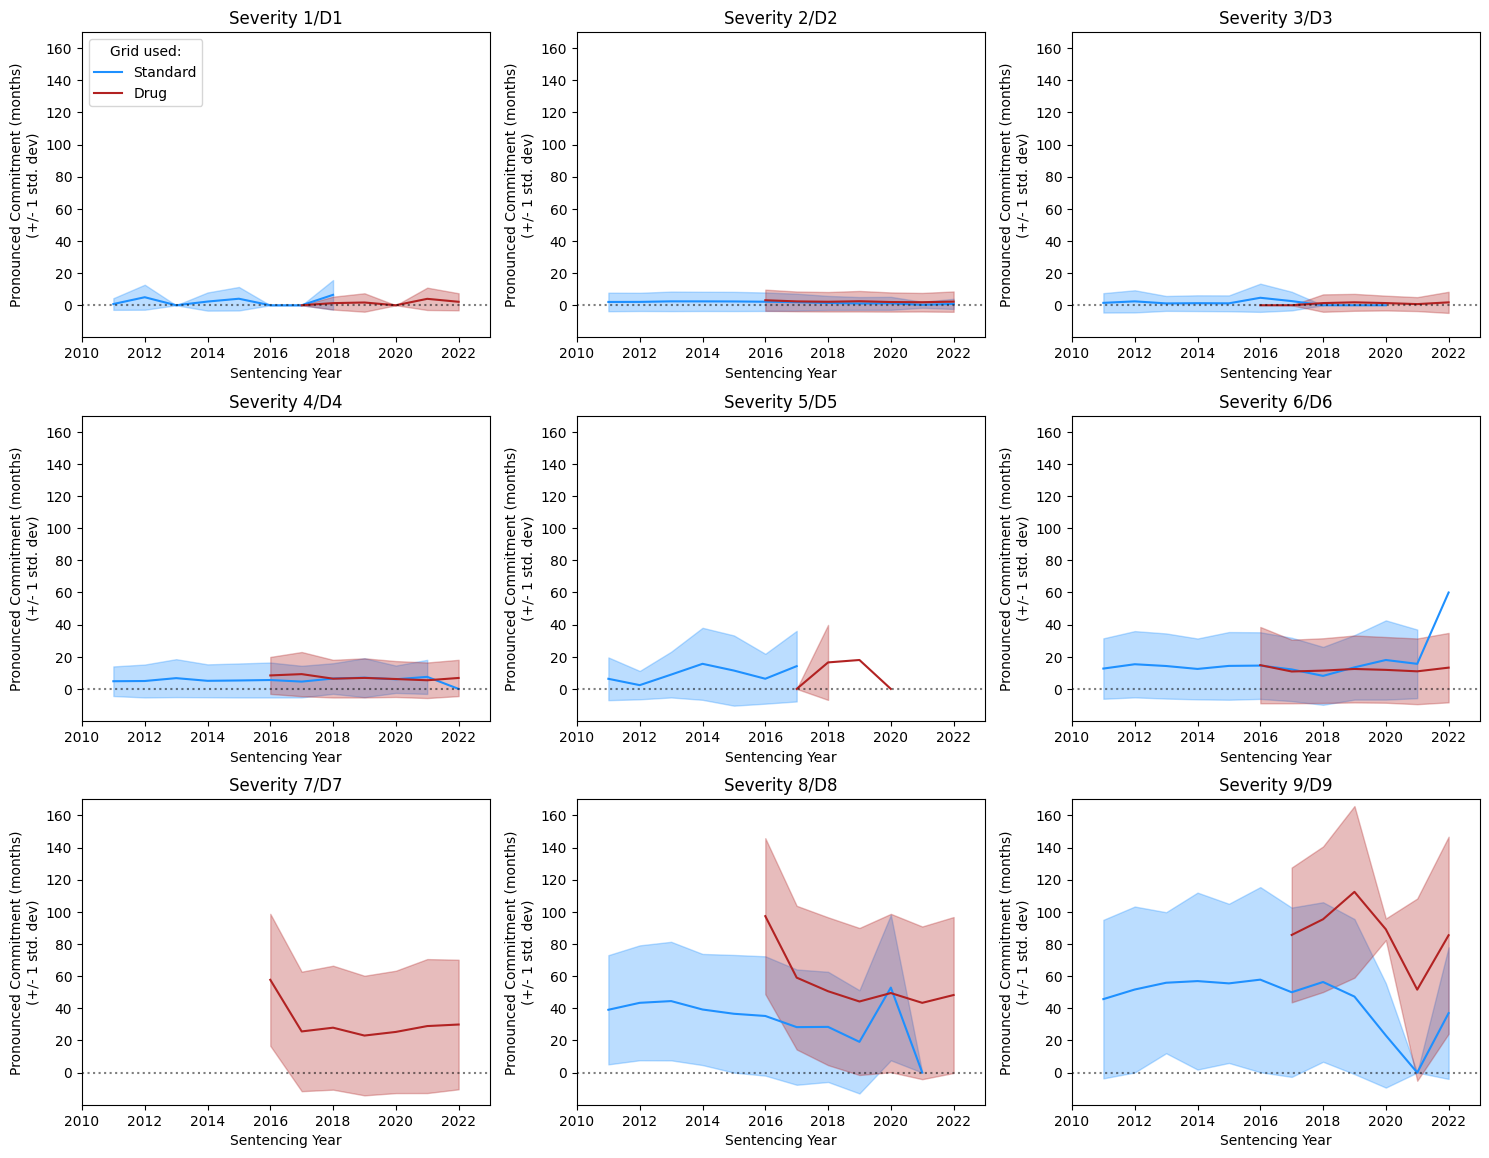

In [35]:
# pronounced commitment x Severity
agg_df = df_drugs.groupby(['sentyear','severity']).agg({
                                                        'pronounced_commitment': ['mean', 'median', 'std']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['severity'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'severity'])

agg_df = (agg_df.set_index(['sentyear', 'severity']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'severity']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for idx, level in enumerate(range(1,10)):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{level}',f'd{level}'],['Standard','Drug']):
        data = agg_df[agg_df['severity'] == grid]
        axes[idx].plot(data['sentyear'], data['pronounced_commitment_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['pronounced_commitment_mean'] - data['pronounced_commitment_std'],
                                data['pronounced_commitment_mean'] + data['pronounced_commitment_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'Severity {level}/D{level}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Pronounced Commitment (months)\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-20, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\pronounced_commitment_by_severity.png')
plt.show()

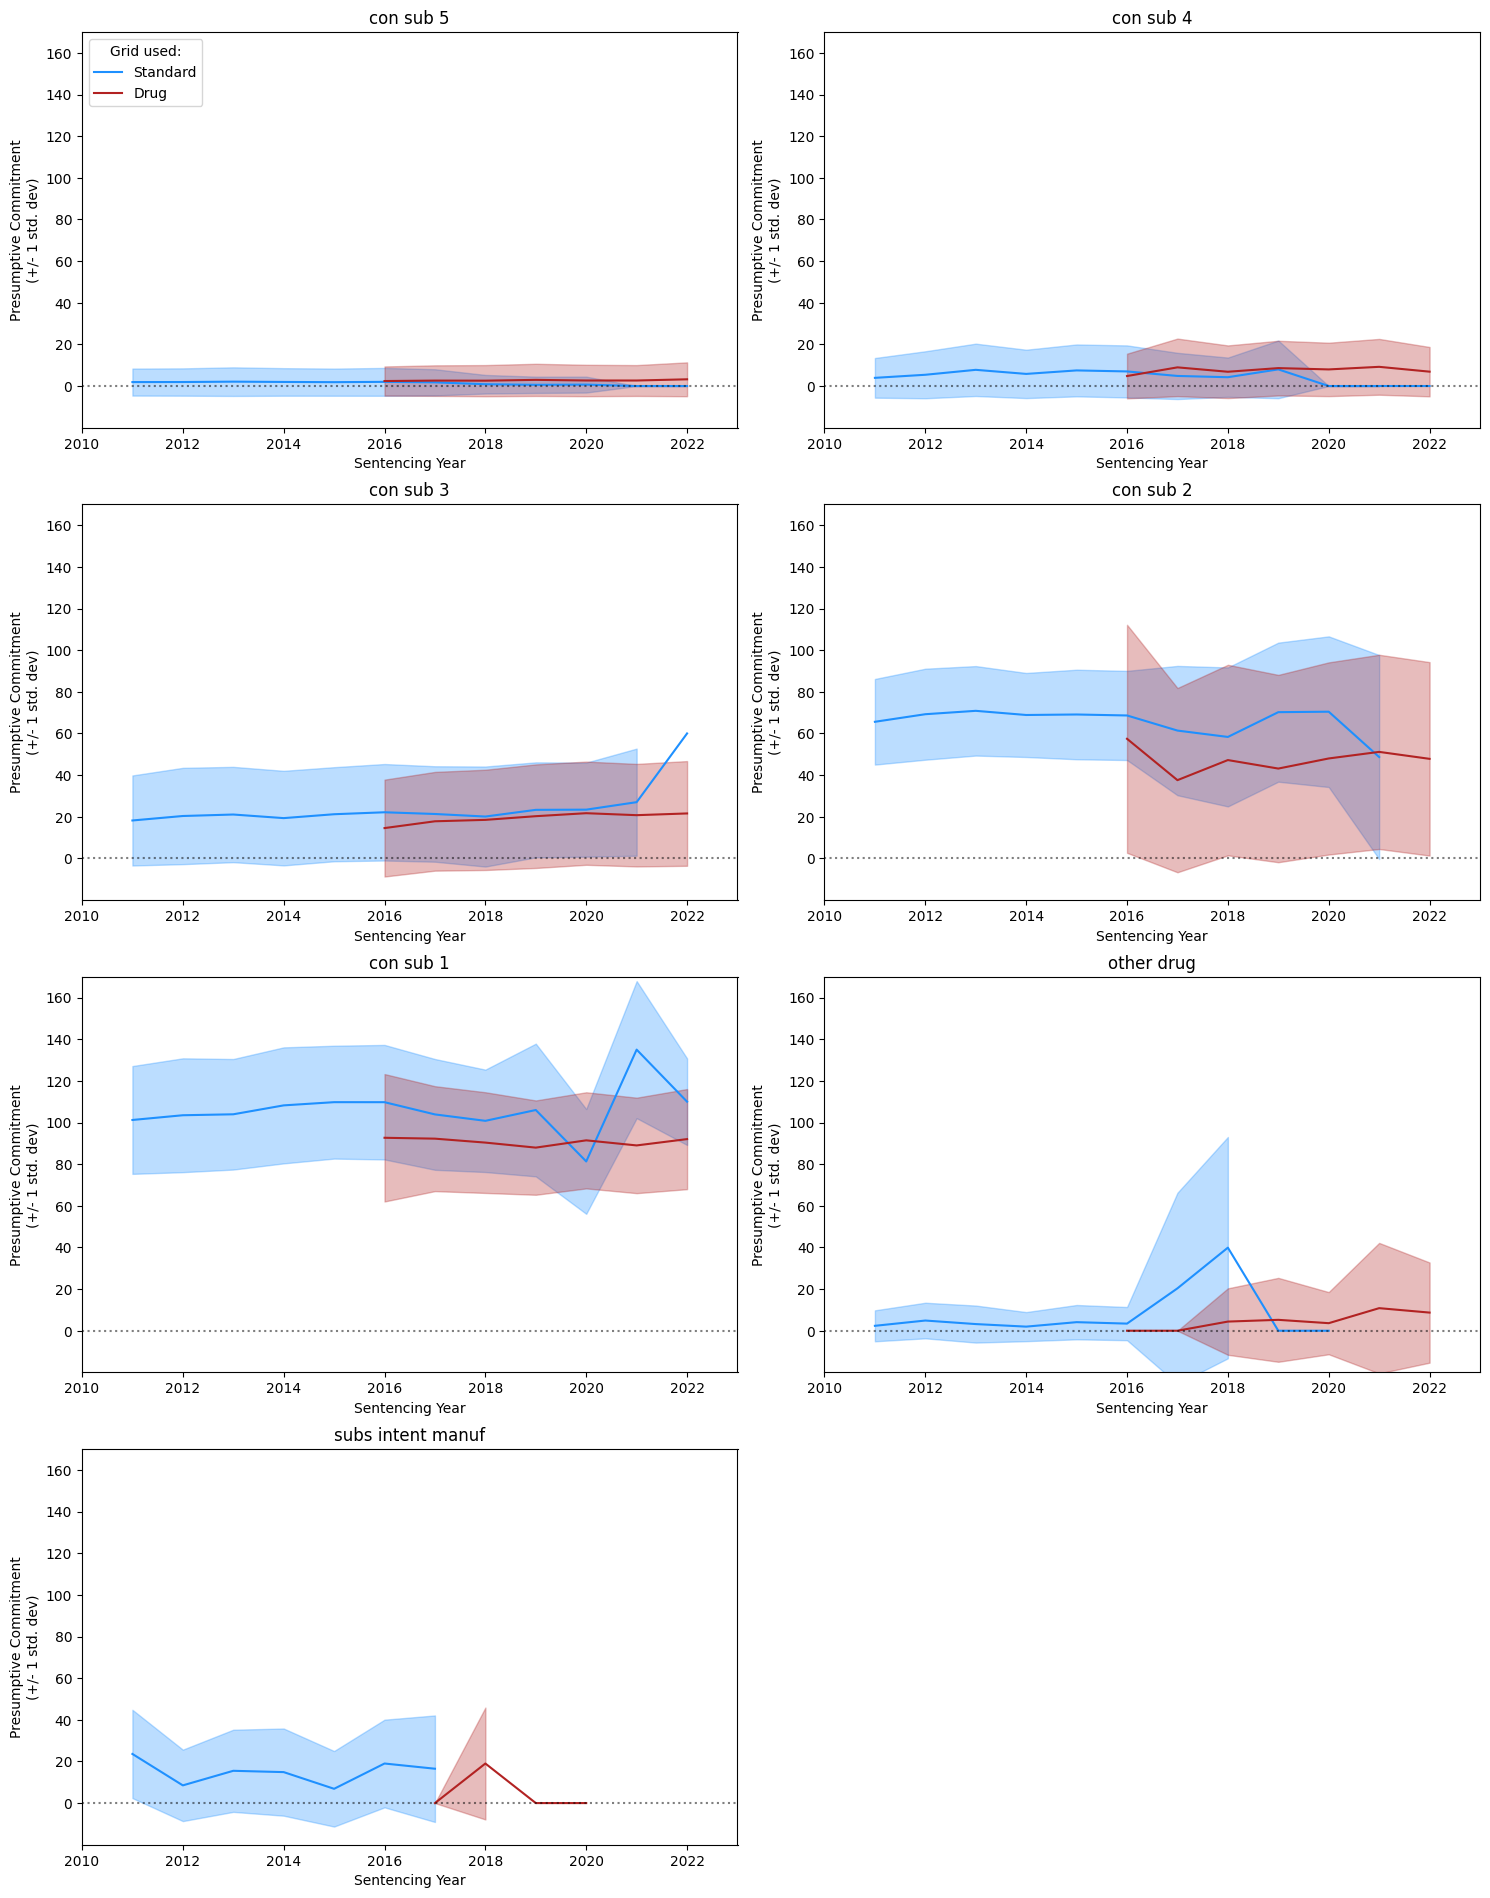

In [34]:
# presumptive commitment x Offense
agg_df = df_drugs.copy(deep=True)

agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'presumptive_commitment': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['presumptive_commitment_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['presumptive_commitment_mean'] - data['presumptive_commitment_std'],
                                data['presumptive_commitment_mean'] + data['presumptive_commitment_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Presumptive Commitment\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-20, 170)
    axes[idx].set_yticks(np.arange(0, 161, 20))

axes[-1].axis('off')


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\presumptive_commitment_by_offense.png')
plt.show()

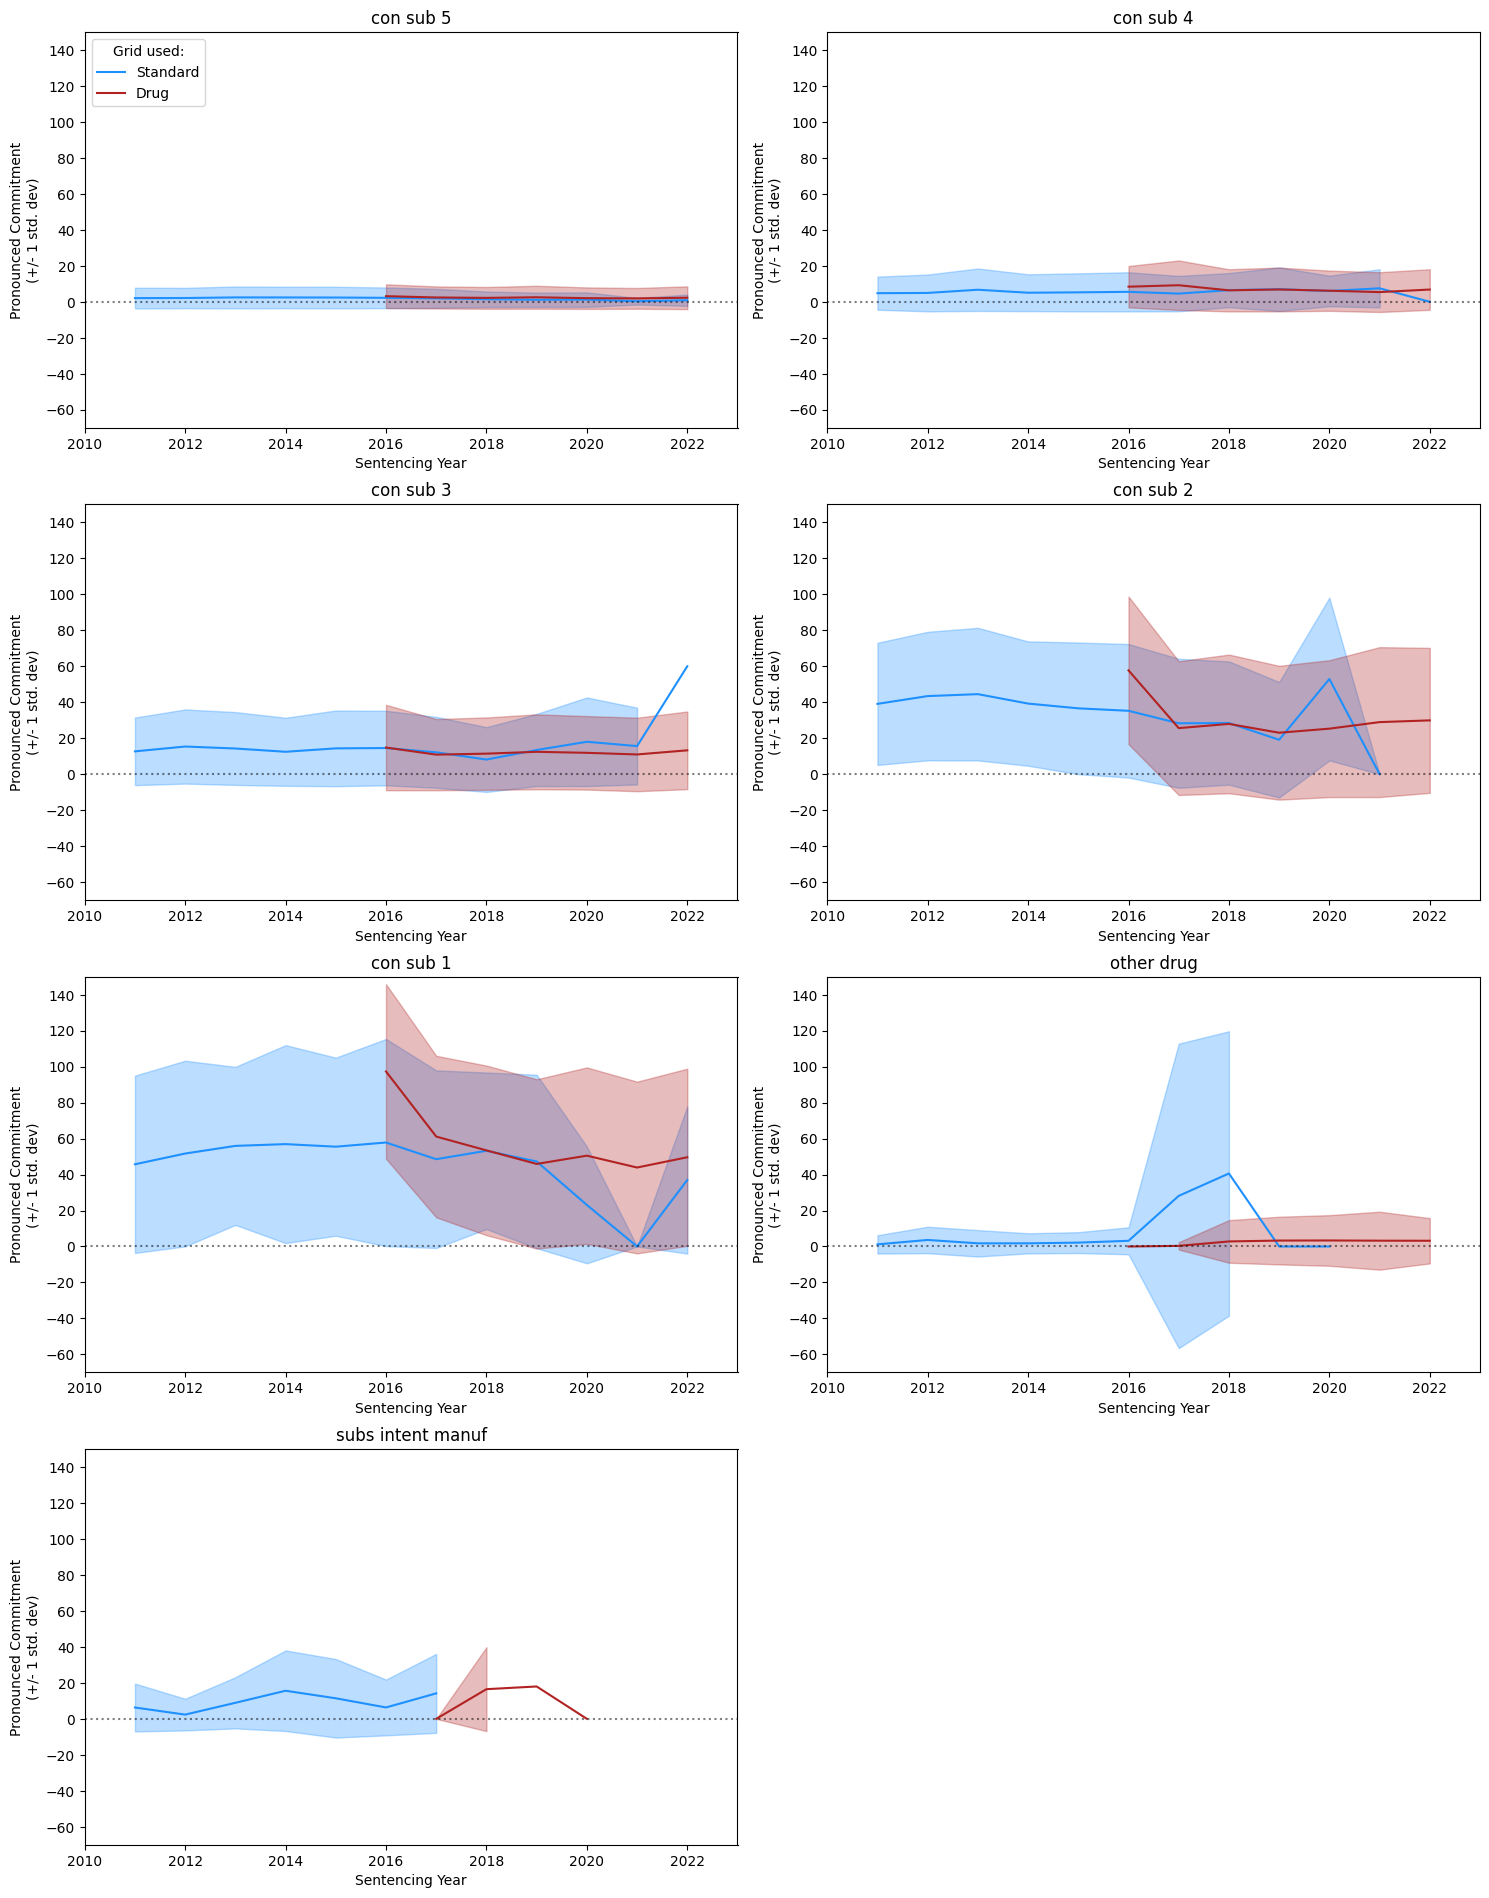

In [33]:
# pronounced commitment x Offense
agg_df = df_drugs.copy(deep=True)

agg_df['grid_type'] = np.where(agg_df['severity'].str.contains('d'), 'Drug', 'Standard')
agg_df['Offense_x_grid'] = agg_df['Offense']+'_'+agg_df['grid_type']
agg_df = agg_df.groupby(['sentyear','Offense_x_grid']).agg({
                                                        'pronounced_commitment': ['mean', 'median', 'std','count']
                                                    }).reset_index()

agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns.values]

years = agg_df['sentyear'].unique()
severity_levels = agg_df['Offense_x_grid'].unique()

multi_index = pd.MultiIndex.from_product([years, severity_levels], names=['sentyear', 'Offense_x_grid'])

agg_df = (agg_df.set_index(['sentyear', 'Offense_x_grid']).reindex(multi_index).reset_index()
                            .sort_values(by=['sentyear', 'Offense_x_grid']).reset_index(drop=True)
                            )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

axes = axes.flatten()

for idx, crime in enumerate(['con sub 5', 'con sub 4', 'con sub 3', 'con sub 2', 'con sub 1','other drug', 'subs intent manuf']):
    for color, grid, legend_label in zip(['dodgerblue','firebrick'],[f'{crime}_Standard',f'{crime}_Drug'],['Standard','Drug']):
        data = agg_df[agg_df['Offense_x_grid'] == grid]
        axes[idx].plot(data['sentyear'], data['pronounced_commitment_mean'], label=legend_label, color=color)
        axes[idx].fill_between(data['sentyear'],
                                data['pronounced_commitment_mean'] - data['pronounced_commitment_std'],
                                data['pronounced_commitment_mean'] + data['pronounced_commitment_std'],
                                color=color, alpha=0.3)

    axes[idx].set_title(f'{crime}')
    axes[idx].set_xlabel('Sentencing Year')
    axes[idx].set_ylabel('Pronounced Commitment\n(+/- 1 std. dev)')
    
    if idx == 0:
        axes[idx].legend(title = 'Grid used:', loc = 'upper left')

    axes[idx].axhline(0, color='black', linestyle=':', alpha=0.5)
    
    axes[idx].set_xlim(2010,2023)
    axes[idx].set_ylim(-70, 150)
    axes[idx].set_yticks(np.arange(-60, 141, 20))

axes[-1].axis('off')


plt.tight_layout()
plt.subplots_adjust(bottom=0.075)

fig.savefig('..\\figures\\pronounced_commitment_by_offense.png')
plt.show()